<a href="https://colab.research.google.com/github/EdioHub/Ice_sales_ANN/blob/main/sorvete_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1- Importação da biblioteca

In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
tf.__version__

'2.14.0'

# Etapa 2- Importação da base de dados

In [67]:
ice_df = pd.read_csv("/content/SalesData.csv")
ice_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [6]:
ice_df.shape


(500, 2)

In [7]:
ice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [8]:
ice_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# Etapa 3- Visualização dos dados

<Axes: xlabel='Temperature', ylabel='Revenue'>

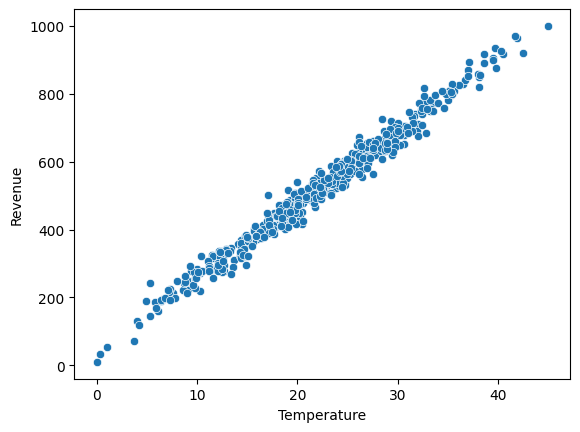

In [9]:
sns.scatterplot( x=ice_df['Temperature'], y = ice_df["Revenue"])

# Etapa 4- Criação das variáveis da base de dados

In [49]:
X_train = ice_df['Temperature']
y_train = ice_df['Revenue']

In [22]:
X_train.shape

(500,)

In [23]:
y_train.shape

(500,)

# Etapa 5- Criação e construção do modelo

abaixo temos 10 neuronios de saida ligados a  segunda camada que vai ter apenas uma saída

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=10, input_shape=[1]))
model.add(tf.keras.layers.Dense(units = 1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss = 'mean_squared_error')

In [39]:
epochs_hist = model.fit(x_train, y_train, epochs = 500)

Epoch 1/500
16/16 [==============================] - 1s 2ms/step - loss: 903.7911
Epoch 2/500
16/16 [==============================] - 0s 2ms/step - loss: 722.8770
Epoch 3/500
16/16 [==============================] - 0s 2ms/step - loss: 655.7267
Epoch 4/500
16/16 [==============================] - 0s 3ms/step - loss: 646.1375
Epoch 5/500
16/16 [==============================] - 0s 3ms/step - loss: 661.0986
Epoch 6/500
16/16 [==============================] - 0s 3ms/step - loss: 686.0833
Epoch 7/500
16/16 [==============================] - 0s 2ms/step - loss: 676.3397
Epoch 8/500
16/16 [==============================] - 0s 3ms/step - loss: 645.7095
Epoch 9/500
16/16 [==============================] - 0s 3ms/step - loss: 679.9515
Epoch 10/500
16/16 [==============================] - 0s 3ms/step - loss: 642.9819
Epoch 11/500
16/16 [==============================] - 0s 2ms/step - loss: 653.1763
Epoch 12/500
16/16 [==============================] - 0s 2ms/step - loss: 656.6365
Epoch 13/500


# Etapa 6- Avaliação do modelo

In [40]:
epochs_hist.history.keys()

dict_keys(['loss'])

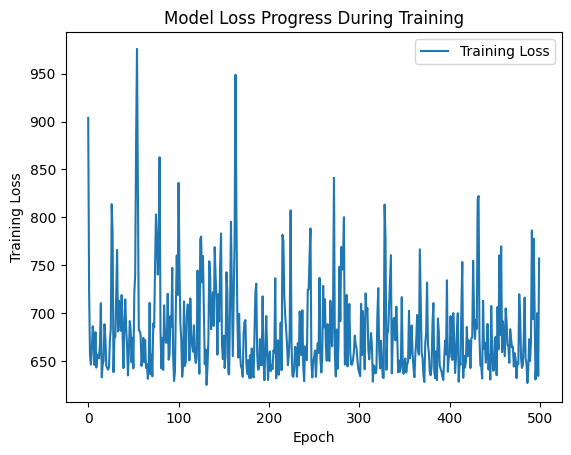

In [41]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

Não tivemos uma boa adaptação a essa base de dados, os valores oscilan demasiadamente


In [43]:
model.get_weights()

[array([[ 0.01974632,  0.07066118, -0.3325793 , -0.09673753,  0.3388525 ,
         -0.01382587, -0.02066908,  3.3476586 , -0.01227553, -3.126269  ]],
       dtype=float32),
 array([-3.6982682e-01, -1.3262185e+00, -2.2186508e+00, -1.5649572e-03,
        -1.0371180e-01,  2.6157370e-01,  3.0098873e-01,  5.0657377e+00,
         3.2691833e-01, -4.8667636e+00], dtype=float32),
 array([[ 5.8362852e-03],
        [ 1.7364349e-02],
        [-4.0485328e-01],
        [ 8.7217405e-02],
        [-3.1461948e-01],
        [-3.5349119e-03],
        [ 6.5214711e-04],
        [ 3.4135277e+00],
        [-5.8567477e-04],
        [-3.1948721e+00]], dtype=float32),
 array([11.003462], dtype=float32)]

## Etapa 6A - Previsão com o modelo treinado

In [65]:

temp = 25
revenue = model.predict([temp])
print('Revenue Predictions Using Trained ANN =', revenue)

1/1 [==============================] - 0s 62ms/step
Revenue Predictions Using Trained ANN = [[580.6573]]


16/16 [==============================] - 0s 3ms/step


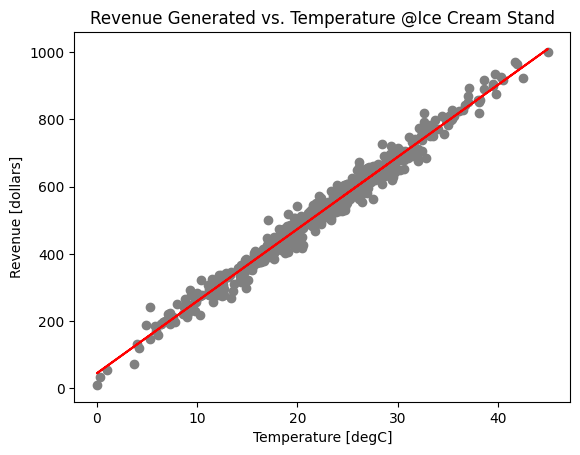

In [66]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand');

# Etapa 7- Confirmação de resultados usando sklearn

In [50]:
X_train.shape

(500,)

In [51]:
X_train = X_train.values.reshape(-1,1)

In [52]:
X_train.shape

(500, 1)

In [53]:
y_train = y_train.values.reshape(-1,1)

In [54]:
y_train.shape

(500, 1)

In [55]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [56]:
regressor.coef_

array([[21.44362551]])

In [57]:
regressor.intercept_

array([44.83126709])

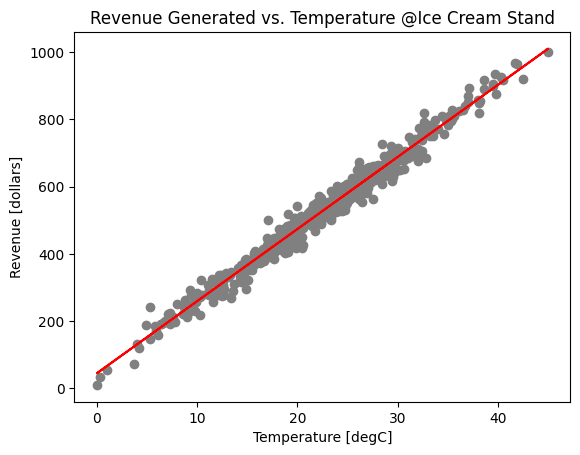

In [58]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand');

In [64]:
temp = 25
revenue = regressor.predict([[temp]])
print('Revenue Predictions Using Trained ANN =', revenue) #Artificial Neural Network

Revenue Predictions Using Trained ANN = [[580.92190486]]



O modelo de previsão que estamos utilizando se baseia exclusivamente nas mudanças de temperatura para prever as vendas. No entanto, é importante ressaltar que as vendas podem ser influenciadas por diversos outros fatores, como o dia da semana, condições climáticas, eventos especiais, férias e uma série de variáveis que certamente desempenham um papel significativo no resultado das vendas.

O gráfico apresentado anteriormente ilustra todas as medições do conjunto de dados, com uma linha vermelha representando as previsões do nosso modelo. Essa linha de previsão serve como um ponto de comparação para avaliar o desempenho do modelo.

Além disso, na Etapa 7, utilizamos um modelo do sklearn para fins de comparação e avaliação dos resultados obtidos com o modelo principal.